In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import json
import os
import sys
import pandas as pd
import pickle

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *

In [34]:
results = load_results(os.path.join(data_path, "solutions", "geometric", '300:sources30:varfac', "gurobi"), 
                       os.path.join(data_path,'geometric','100-300:sources30'))

Empty DataFrame
Columns: []
Index: []


KeyError: 'id'

In [3]:
for col in results.columns:
    print('-----')
    print(results[col].value_counts())

-----
2.0    7
Name: facility_capacity, dtype: int64
-----
1488141208950637320    1
1488141208960977560    1
1488141208967355210    1
1488141208955608734    1
1488141208940798139    1
1488141208945770553    1
1488141208974649331    1
Name: id, dtype: int64
-----
17.0    7
Name: number of facilities, dtype: int64
-----
1477.0    1
1150.0    1
1380.0    1
1086.0    1
1258.0    1
1379.0    1
965.0     1
Name: objective, dtype: int64
-----
0.228483    1
2.052865    1
0.793069    1
1.246382    1
0.633091    1
0.903842    1
0.187353    1
Name: runtime, dtype: int64
-----
0.659587    1
0.678254    1
0.653348    1
0.640137    1
0.648325    1
0.662666    1
0.632263    1
Name: avg_clustering, dtype: int64
-----
11.507143    1
11.030769    1
11.442105    1
11.408000    1
10.800000    1
11.409091    1
11.125000    1
Name: avg_degree, dtype: int64
-----
87.941948     1
111.881487    1
81.402603     1
75.102469     1
119.670391    1
102.289774    1
93.965041     1
Name: avg_dist, dtype: int64
-----


In [4]:
results[['id','vcount','objective','source_num','number of facilities']]

,id,vcount,objective,source_num,number of facilities
0,1488141208940798139,100.0,965.0,30.0,17.0
1,1488141208945770553,130.0,1379.0,30.0,17.0
2,1488141208950637320,160.0,1258.0,30.0,17.0
3,1488141208955608734,190.0,1086.0,30.0,17.0
4,1488141208960977560,220.0,1380.0,30.0,17.0
5,1488141208967355210,250.0,1150.0,30.0,17.0
6,1488141208974649331,280.0,1477.0,30.0,17.0


In [6]:
results_fcla = load_results(os.path.join(data_path, "solutions", "geometric", '300:sources30:varfac', "fcla"), 
                            os.path.join(data_path,'geometric', '100-300:sources30'))

In [7]:
results_fcla['algorithm'] = 'wma'
results['algorithm'] = 'gurobi'

In [8]:
all_results = pd.concat([results, results_fcla], axis=0)

In [9]:
all_results

,algorithm,avg_clustering,avg_degree,avg_dist,capacity of facilities,ecount,facility_capacity,id,lambda,max_degree,...,runtime,source_avg_clust,source_avg_degree,source_avg_dist,source_avg_eccentricity,source_num,source_std_dist,std_degree,std_dist,vcount
0,gurobi,0.678254,10.800000,75.102469,NaN,540.0,2.0,1488141208940798139,NaN,19.0,...,0.187353,0.706290,10.533333,541.429885,1090.566667,30.0,70094.934739,13.620000,2520.504315,100.0
1,gurobi,0.653348,11.030769,81.402603,NaN,717.0,2.0,1488141208945770553,NaN,21.0,...,0.228483,0.606312,11.066667,559.597701,1040.900000,30.0,65484.203673,14.629822,1940.074080,130.0
2,gurobi,0.659587,11.125000,87.941948,NaN,890.0,2.0,1488141208950637320,NaN,19.0,...,0.903842,0.624578,11.866667,542.397701,1076.866667,30.0,65427.747581,14.521875,1766.774533,160.0
3,gurobi,0.662666,11.442105,93.965041,NaN,1087.0,2.0,1488141208955608734,NaN,20.0,...,0.633091,0.634027,12.533333,552.491954,1071.633333,30.0,68783.376372,14.088753,2064.005524,190.0
4,gurobi,0.648325,11.409091,102.289774,NaN,1255.0,2.0,1488141208960977560,NaN,19.0,...,1.246382,0.663321,10.933333,549.498851,1072.933333,30.0,61067.275286,13.759917,2686.585088,220.0
5,gurobi,0.640137,11.408000,111.881487,NaN,1426.0,2.0,1488141208967355210,NaN,20.0,...,0.793069,0.698441,10.266667,611.390805,1124.566667,30.0,88218.054168,15.017536,3596.525693,250.0
6,gurobi,0.632263,11.507143,119.670391,NaN,1611.0,2.0,1488141208974649331,NaN,19.0,...,2.052865,0.617164,12.000000,560.779310,1095.700000,30.0,69089.744400,13.957092,4815.326284,280.0
0,wma,0.653348,11.030769,81.402603,0.0,717.0,NaN,1488141208945770553,0.0,21.0,...,0.005418,0.606312,11.066667,559.597701,1040.900000,30.0,65484.203673,14.629822,1940.074080,130.0
1,wma,0.659587,11.125000,87.941948,0.0,890.0,NaN,1488141208950637320,0.0,19.0,...,0.011545,0.624578,11.866667,542.397701,1076.866667,30.0,65427.747581,14.521875,1766.774533,160.0
2,wma,0.662666,11.442105,93.965041,0.0,1087.0,NaN,1488141208955608734,0.0,20.0,...,0.007056,0.634027,12.533333,552.491954,1071.633333,30.0,68783.376372,14.088753,2064.005524,190.0


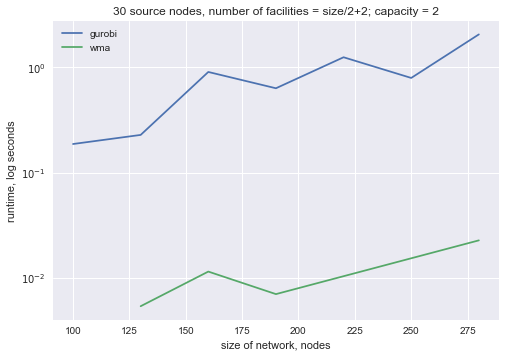

In [23]:
# plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')

plt.plot(results['vcount'],results['runtime'],label="gurobi")
plt.plot(results_fcla['vcount'],results_fcla['runtime'],label='wma')
plt.xlabel("size of network, nodes")
plt.ylabel("runtime, log seconds")
plt.title("30 source nodes, number of facilities = size/2+2; capacity = 2")
plt.legend()

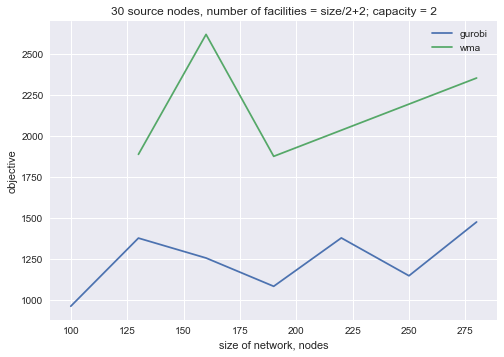

In [24]:
plt.plot(results['vcount'],results['objective'],label="gurobi")
plt.plot(results_fcla['vcount'],results_fcla['objective'],label='wma')
plt.xlabel("size of network, nodes")
plt.ylabel("objective")
plt.title("30 source nodes, number of facilities = size/2+2; capacity = 2")
plt.legend()